# Final Assignment - Part 1

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type.

In [3]:
import pandas as pd

In [6]:
sps = pd.read_csv("./data/Software Professionals Salary.csv")

1. What is the shape (rows, cols) of the `sps` DataFrame?

In [7]:
print(sps.shape)

(22770, 8)


2. How many unique `Job Roles` are there in the dataset?

In [16]:
unique_roles = sps["Job Roles"].unique()
unique_roles_count = len(unique_roles)
print(unique_roles_count, unique_roles)

11 ['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing']


3. How many unique `Job Title` are there for the "Python" `Job Role`?

In [20]:
all_python_jobs = sps[sps["Job Roles"] == "Python"]
unique_titles = all_python_jobs["Job Title"].unique()
unique_titles_count = len(unique_titles)
print(unique_titles_count)

102


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [46]:
filter_roles = sps["Job Roles"] == "Python"
filter_titles = sps["Job Title"].str.contains("Analyst")
combined_filter = filter_roles * filter_titles
companies = sps[combined_filter]["Company Name"].unique()
print(companies, len(companies))

['Ocwen Financial' 'TrioHats Consulting' 'Infosys'] 3


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [62]:
salaries = sps.groupby(by="Company Name")["Salaries Reported"].count()
salaries = salaries.sort_values(ascending=False)
print(salaries)

Company Name
Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
IW                                  1
Iamneo.ai                           1
Iblesoft                            1
Ibmec                               1
‎eNotice Ninja Pluss                1
Name: Salaries Reported, Length: 11260, dtype: int64


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in?

In [66]:
relevant_rows = sps[sps["Company Name"] == "Tata Consultancy Services"]
locations = relevant_rows["Location"].unique()
print(locations, len(locations))
print(relevant_rows.head())

['Bangalore' 'Chennai' 'Hyderabad' 'New Delhi' 'Pune' 'Kerala' 'Kolkata'
 'Madhya Pradesh' 'Mumbai'] 9
     Rating               Company Name                       Job Title  \
602     3.9  Tata Consultancy Services        Senior Android Developer   
814     3.9  Tata Consultancy Services  Android Applications Developer   
837     3.9  Tata Consultancy Services                Android Engineer   
933     3.9  Tata Consultancy Services           Android Test Engineer   
944     3.9  Tata Consultancy Services               Android Developer   

      Salary  Salaries Reported   Location Employment Status Job Roles  
602   400000                  2  Bangalore         Full Time   Android  
814   360000                  1  Bangalore         Full Time   Android  
837  1000000                  1  Bangalore         Full Time   Android  
933   200000                  1  Bangalore         Full Time   Android  
944   288000                  1    Chennai         Full Time   Android  


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [93]:
import requests
response = requests.get("https://open.er-api.com/v6/latest/USD")
rate = ""
if (response.status_code == 200):
	print("Success")
	json = response.json()
	current_rate_INR = json["rates"]["INR"]
	print("current rate: 1 USD ==", current_rate_INR, "INR")
	sps["Salary USD"] = sps["Salary"] / current_rate_INR
	print(sps.head())

Success
current rate: 1 USD == 83.547532 INR
   Rating                      Company Name          Job Title   Salary  \
0     3.8                            Sasken  Android Developer   400000   
1     4.5  Advanced Millennium Technologies  Android Developer   400000   
2     4.0                         Unacademy  Android Developer  1000000   
3     3.8                SnapBizz Cloudtech  Android Developer   300000   
4     4.4            Appoids Tech Solutions  Android Developer   600000   

   Salaries Reported   Location Employment Status Job Roles    Salary USD  
0                  3  Bangalore         Full Time   Android   4787.693788  
1                  3  Bangalore         Full Time   Android   4787.693788  
2                  3  Bangalore         Full Time   Android  11969.234471  
3                  3  Bangalore         Full Time   Android   3590.770341  
4                  3  Bangalore         Full Time   Android   7181.540683  


8. What is the average `Salary USD` for the "Python" `Job Role`?

In [97]:
sps[sps["Job Roles"] == "Python"]["Salary USD"].mean()

5817.3207555030685

9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s?

In [139]:
salaries_USD = sps.groupby(by="Company Name")[["Rating", "Salary USD"]].mean()
salaries_USD.sort_values(inplace=True, ascending=False, by="Salary USD")
print(salaries_USD.head())

                        Rating    Salary USD
Company Name                                
Thapar University          3.6  1.077231e+06
FFF Enterprises            4.2  1.172985e+05
Digital Raju               4.3  1.172985e+05
Gaana Lyrics Point.com     5.0  1.161016e+05
GGH Heavy Industries       4.6  1.149047e+05


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

Text(0.5, 1.0, 'Salary (USD) over Rating')

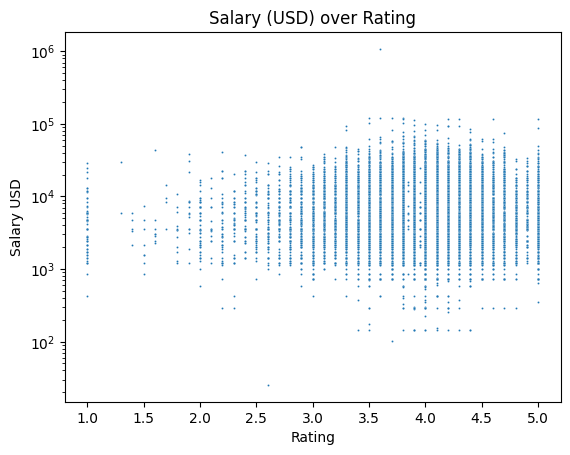

In [135]:
import seaborn as sns

plot = sns.scatterplot(sps, x="Rating", y="Salary USD", s=2)
plot.set_yscale("log")
plot.set_title("Salary (USD) over Rating")

In [140]:
salaries_USD.head()

,Rating,Salary USD
Company Name,,
Thapar University,3.6,1.077231e+06
FFF Enterprises,4.2,1.172985e+05
Digital Raju,4.3,1.172985e+05
Gaana Lyrics Point.com,5.0,1.161016e+05
GGH Heavy Industries,4.6,1.149047e+05
